<h2 style=" color:black ; font-family:  'Comic Sans MS', sans-serif; font-size: 19px; color: Blue; background-color: #e6e6fa ">Importation les bibliothèques nécessaires 
</h2>


In [123]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score


<h2 style=" color:black ; font-family:  'Comic Sans MS', sans-serif; font-size: 19px;  color: Blue;background-color: #e6e6fa ">Etape 1 : collecte les données  
</h2>


In [126]:
df =pd.read_excel(r"C:\Users\Rawana\Desktop\NoteBook Module3\Salary_Data.xlsx")

# afficher les premières lignes
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


<h2 style=" color:black ; font-family:  'Comic Sans MS', sans-serif; font-size: 19px;  color: Blue; background-color: #e6e6fa">
    Affichage des statistiques descriptives 
</h2>

In [131]:
print(" Statistiques descriptives des données")
print(df.describe().round(1))

 Statistiques descriptives des données
       YearsExperience    Salary
count             30.0      30.0
mean               5.3   76003.0
std                2.8   27414.4
min                1.1   37731.0
25%                3.2   56720.8
50%                4.7   65237.0
75%                7.7  100544.8
max               10.5  122391.0


<h2 style=" color:black ; font-family:  'Comic Sans MS', sans-serif; font-size: 19px; color: Blue ;background-color: #e6e6fa">
 Visualisation des données- Nuage de points 
</h2>

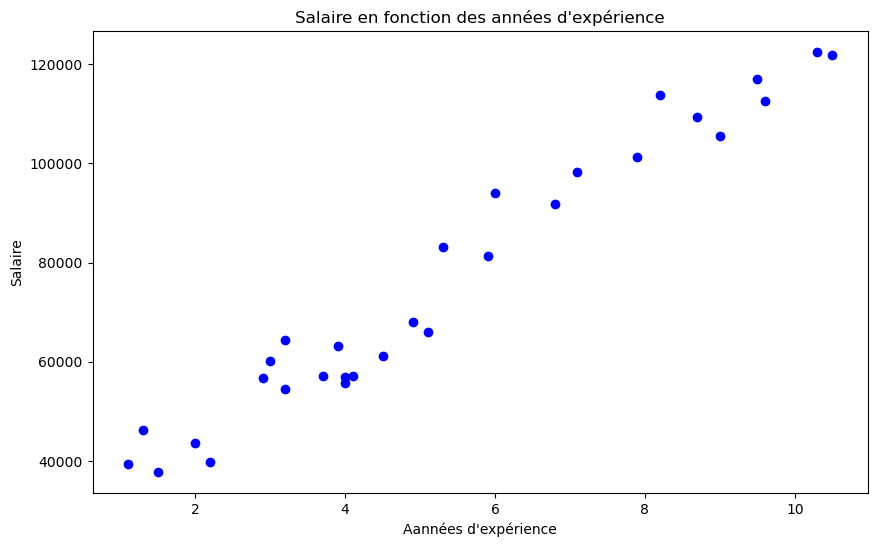

In [135]:
plt.figure(figsize=(10,6))
plt.scatter(df['YearsExperience'],df['Salary'],color='blue')
plt.title('Salaire en fonction des années d\'expérience')
plt.xlabel('Aannées d\'expérience')
plt.ylabel('Salaire')
plt.show()

- Ici nous pouvons observer que la relation entre Années d'éxpérience et Salaire semble linéaire (positivement)

<h2 style=" color:black ; font-family:  'Comic Sans MS', sans-serif; font-size: 19px; color: Blue;background-color: #e6e6fa ">
Separation des variables Feature (année d'éxpérience) et Target (Salaire)   </h2>

In [164]:
# Prepare the data
x = df[['YearsExperience']]#Feature 
y = df['Salary']#Target


<h2 style=" color:black ; font-family:  'Comic Sans MS', sans-serif; font-size: 19px; color: Blue;background-color: #e6e6fa ">
Etape 2: Division des données en ensembles d'entraînement (train dataset) et de test (test dataset)   </h2>

In [167]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=0)

<h2 style=" color:black ; font-family:  'Comic Sans MS', sans-serif; font-size: 19px; color: Blue;background-color: #e6e6fa ">
Création du modèle de régression linéaire  </h2>

In [197]:
# Create and train the model
model = LinearRegression()

<h2 style=" color:black ; font-family:  'Comic Sans MS', sans-serif; font-size: 19px; color: Blue;background-color: #e6e6fa ">
Entraînement le modèle de régression linéaire   </h2>

In [200]:
model.fit(x_train, y_train)

LinearRegression()

<h2 style=" color:black ; font-family:  'Comic Sans MS', sans-serif; font-size: 19px; color: Blue;background-color: #e6e6fa ">
Etape 4: Évaluation ------> Prédiction sur le test de dataset (données invisibles)  </h2>

<h2 style=" color:black ; font-family:  'Comic Sans MS', sans-serif; font-size: 19px; color: Blue;background-color: #e6e6fa ">
Comparaison des valeurs réelles et prédites </h2>

In [215]:
comparaison= pd.DataFrame({'Valeurs réelles':y_test, 'Valeurs prédites':y_pred})
comparaison.reset_index(drop=True, inplace=True)#Réinitialisation de l'index pour une meilleur lisibilité 

comparaison

,Valeurs réelles,Valeurs prédites
0,37731,40748.961841
1,122391,122699.622956
2,57081,64961.657170
3,63218,63099.142145
4,116969,115249.562855
5,109431,107799.502753


<h2 style=" color:black ; font-family:  'Comic Sans MS', sans-serif; font-size: 19px; color: Blue;background-color: #e6e6fa ">
Coefficient de determination R²  </h2>

In [225]:
r2=r2_score(y_test,y_pred)
#Affichage des métrique d'évaluation
print(f"Coefficient de determination (R²):{r2}")

Coefficient de determination (R²):0.988169515729126


<h2 style=" color:black ; font-family:  'Comic Sans MS', sans-serif; font-size: 19px; color: Blue;background-color: #e6e6fa ">
Prédications  </h2>

In [231]:
salaire_pred= model.predict([[13],[14]])
salaire_pred

C:\Users\Rawana\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([147843.57579811, 157156.15092484])

<h2 style=" color:black ; font-family:  'Comic Sans MS', sans-serif; font-size: 19px; color: Blue; background-color: #e6e6fa">
Construction de la droite de regression = Droite passant par le plus proche possible des points de nuage de points 
</h2>

In [243]:
y_pred=model.predict(x_test)

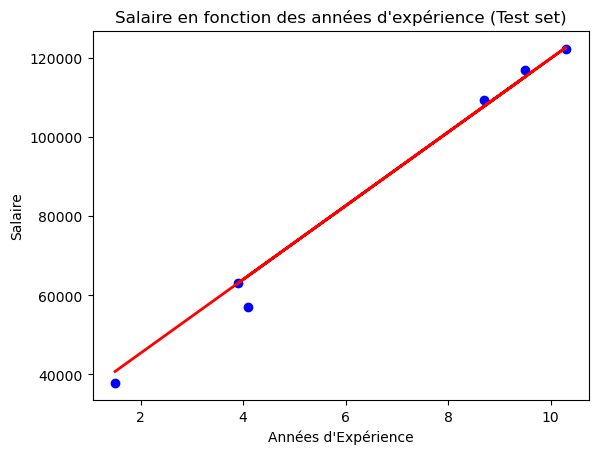

In [240]:
#Visualisation de la droite de régression # Visualisation de la droite de régression
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.title("Salaire en fonction des années d'expérience (Test set)")
plt.xlabel("Années d'Expérience")
plt.ylabel('Salaire')
plt.show()